# HR Analytics Project- Understanding the Attrition in HR

<b>Problem Statement:</b>

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

<b>HR Analytics</b>

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

<b>Attrition in HR</b>

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

<b>Attrition affecting Companies</b>

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

# Reading and Understanding the Data

# IMPORTING ALL THE LIABRARIES

In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings                                                                 
warnings.filterwarnings('ignore') 
%matplotlib inline
from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [165]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [167]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Exploratory Data Analysis

In [168]:
df.isnull().sum()*100/df.shape[0]

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

<AxesSubplot:>

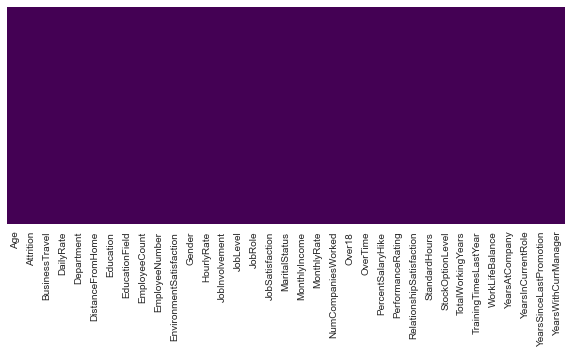

In [169]:
plt.figure(figsize =(10, 4))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

So, we can see that there are no missing values in the dataset.


In [170]:
df.shape

(1470, 35)

The Attrition dataset had 1470 observations with 35 variables. Out of the 35 variables, there exists one target variable Attrition with possible outcomes Yes and No. The other 34 variables are independent variables but one, that was, Employee Number which denotes the employee number or the identification number.

In [171]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

<b>Let check how many employes left the organization.</b>

In [172]:
df.Attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

16 % of the employees left the company. 84% did not leave the company.(Class Imbalance Problem)

This is a Binary Classification Problem, so the Distribution of instances among the 2 classes, is visualized below:

<AxesSubplot:xlabel='Attrition', ylabel='count'>

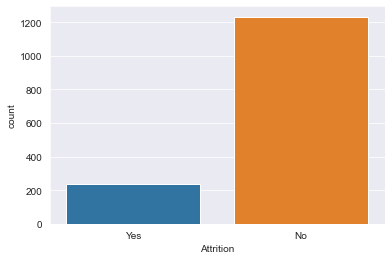

In [173]:
sns.set_style('darkgrid')
sns.countplot(x ='Attrition', data = df)

We can clearly see that Dataset in Imbalanced(84% No , 16% Yes)<br>
The above graph shows the distribution of the target variable. Out of the total of 1470 observations, 1233 is No whereas 167 is Yes. We will treat this imbalance after splitting the data into Training and Test Set.


<AxesSubplot:xlabel='Age', ylabel='Density'>

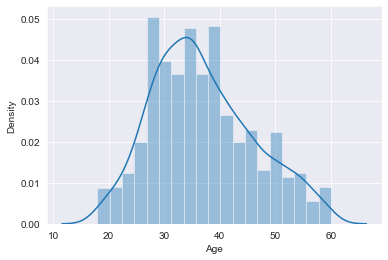

In [174]:
sns.distplot(df['Age'])

Age is fairly normally distributed with average Age around 35. Most of the employees in the range 25 to 45

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

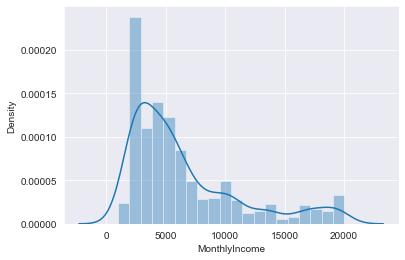

In [175]:
sns.distplot(df['MonthlyIncome'])

Most the employees have their monthly income around 5000

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

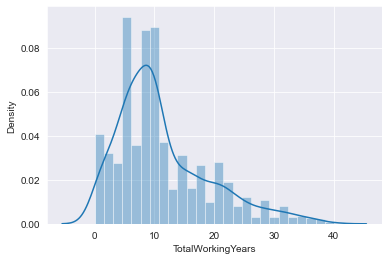

In [176]:
sns.distplot(df['TotalWorkingYears'])

Total Working Years is also right skewed similar to Age

Making density plot using dataset input

In [177]:
def kdePlot(var):
    fig = plt.figure(figsize=(15,4))
    ax=sns.kdeplot(df.loc[(df['Attrition'] == 'No'),var] , color='b',shade=True, label='no Attrition') 
    ax=sns.kdeplot(df.loc[(df['Attrition'] == 'Yes'),var] , color='r',shade=True, label='Attrition')
    plt.title('Employee Attrition with respect to {}'.format(var))

In [178]:
numerical_df=df.select_dtypes(include=np.number)
numeric_cols_kdeplot=list(numerical_df.columns)
remove_columns=['Age','DistanceFromHome','Education','EmployeeCount','EmployeeNumber',
'EnvironmentSatisfaction' ,'HourlyRate','JobInvolvement','JobSatisfaction','MonthlyRate','NumCompaniesWorked',
'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears',
'TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion']
for l in remove_columns:
    numeric_cols_kdeplot.remove(l)

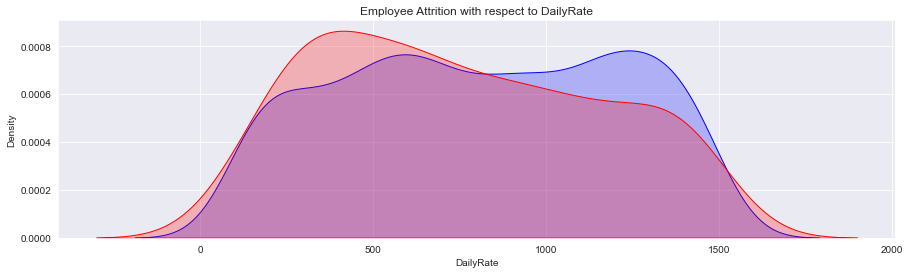

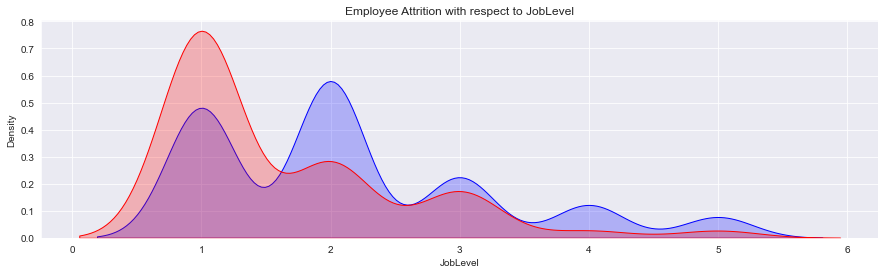

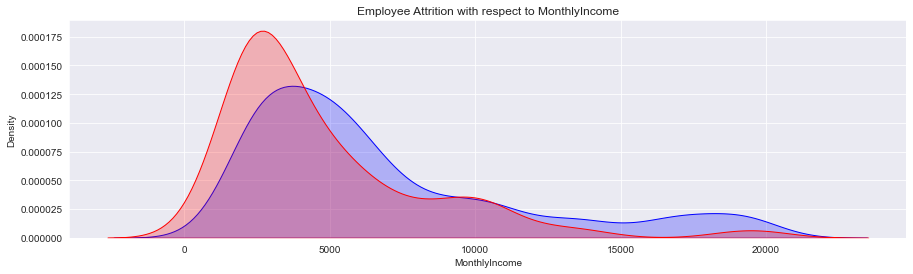

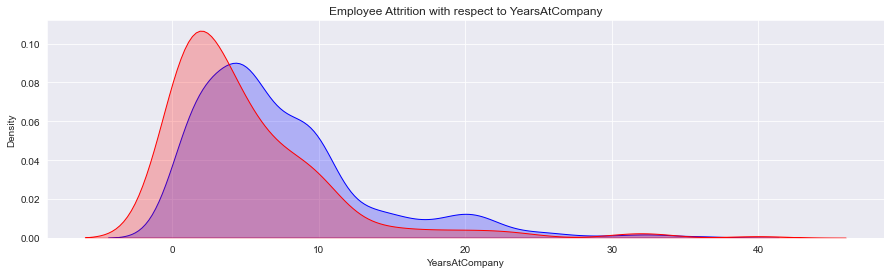

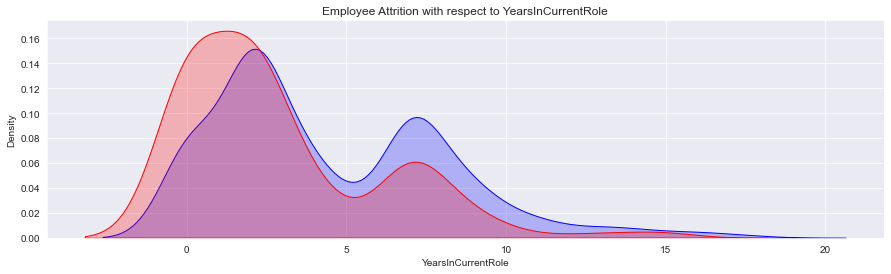

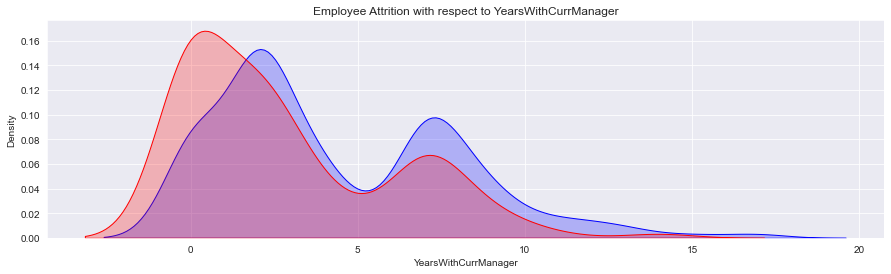

In [179]:
for n in numeric_cols_kdeplot:
    kdePlot(n)

<b>Observations</b>

Attrition is high with Employees having joblevel as 1.

Employees whose monthly income is below 5000 have high attrition.

Employees who worked in the company around 0 to 1 years have high attrition.

Employees who are in current role for around 0 to 4 years have high attrition

Using barplot to understand more correctly dataset attrition

In [180]:
BarPlot_columns=['Age','DistanceFromHome','EducationField',
                'JobInvolvement','JobLevel','JobRole','OverTime','TotalWorkingYears','TrainingTimesLastYear',
                'WorkLifeBalance','YearsInCurrentRole']

In [181]:
def Bar_plots(var):
    col=pd.crosstab(df[var],df.Attrition)
    col.div(col.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,4))
    plt.xticks(rotation=90)

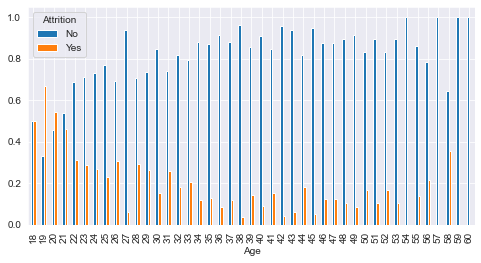

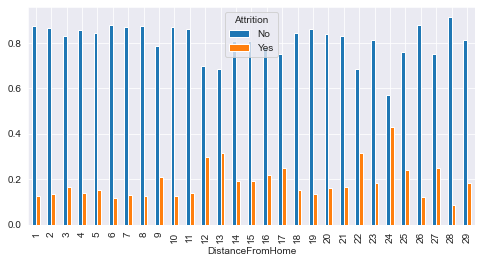

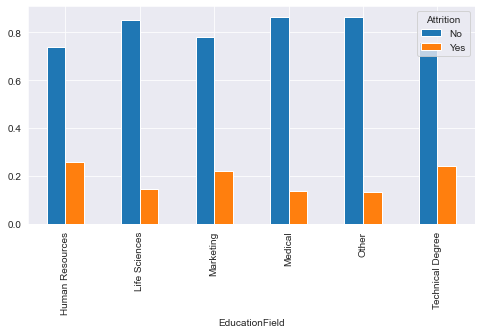

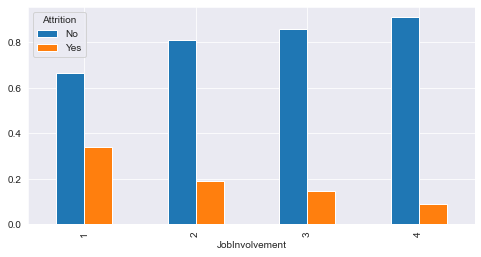

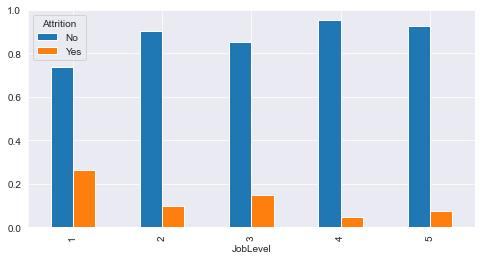

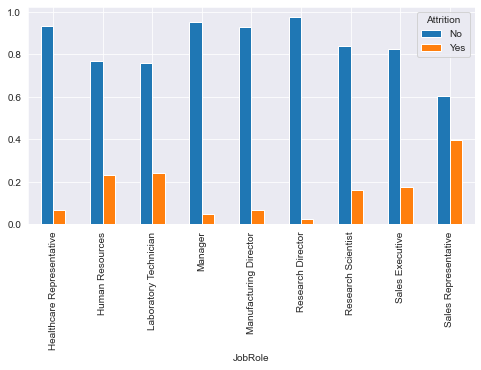

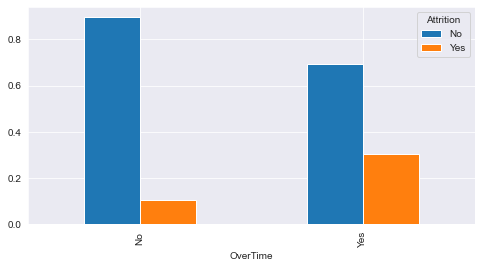

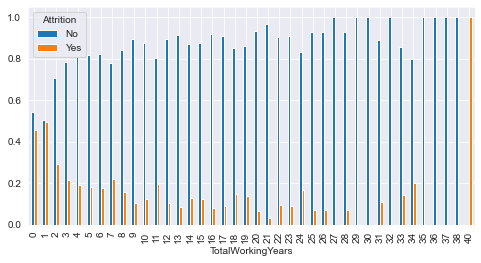

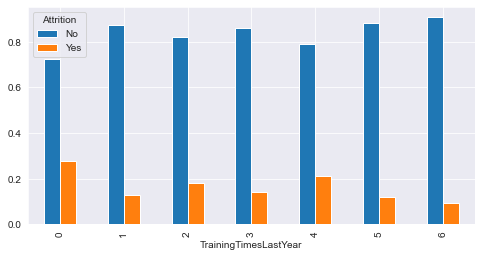

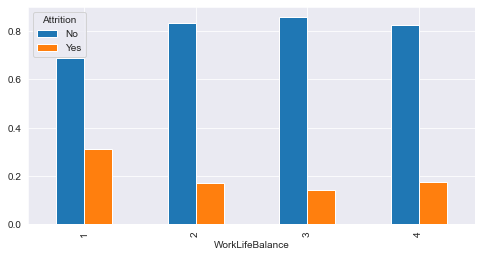

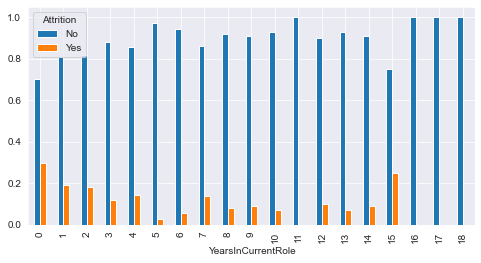

In [182]:
for col in BarPlot_columns:
    Bar_plots(col)

<b>Observations</b>

Attrition is very high with employees having age in between 18 to 22. These might be due to students who are doing intership or small contract jobs

Attrition is more when the distance of office is more from home

Attrition is high with employee's education in the field of Human Resources, Marketing and Technical Degree that other fields

Attrition is high with employee's whose job role is in the field of Human Resources, Sales Representative, Laboratory Technician.

Employees who work over time have high attrition than employees who did not do over time

Employees who are working less than 2 years have more attrition

Replacing Yes with 1 and No with 0 in Attrition Column to figure out the mean value

In [183]:
df['Attrition']=np.where(df['Attrition']=='No',#condition
                 0, #value if condition is true
                 1)

In [184]:
df.describe().iloc[:,:20]

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000


df.EmployeeCount.value_counts()

No of employee - 1470

In [185]:
df.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

1470 Employee standard hours - 80

In [186]:
len(set(df.EmployeeNumber))

1470

Dropping the columns EmployeeCount,StandardHours,EmployeeNumber as these columns does not help in model building.

In [187]:
cols = df.columns[df.isna().any()]
df1 = df.drop(cols, axis = 1)

In [188]:
data.groupby('Attrition').mean().iloc[:,:20]

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany
Attrition,,,,,,,,,,,,,,,,,,,,
1,36.92381,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.79932,2.761224,7.008163


In [189]:
data.groupby('Attrition').mean().iloc[:,20:26]

,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,
1,4.229252,2.187755,4.123129


<AxesSubplot:>

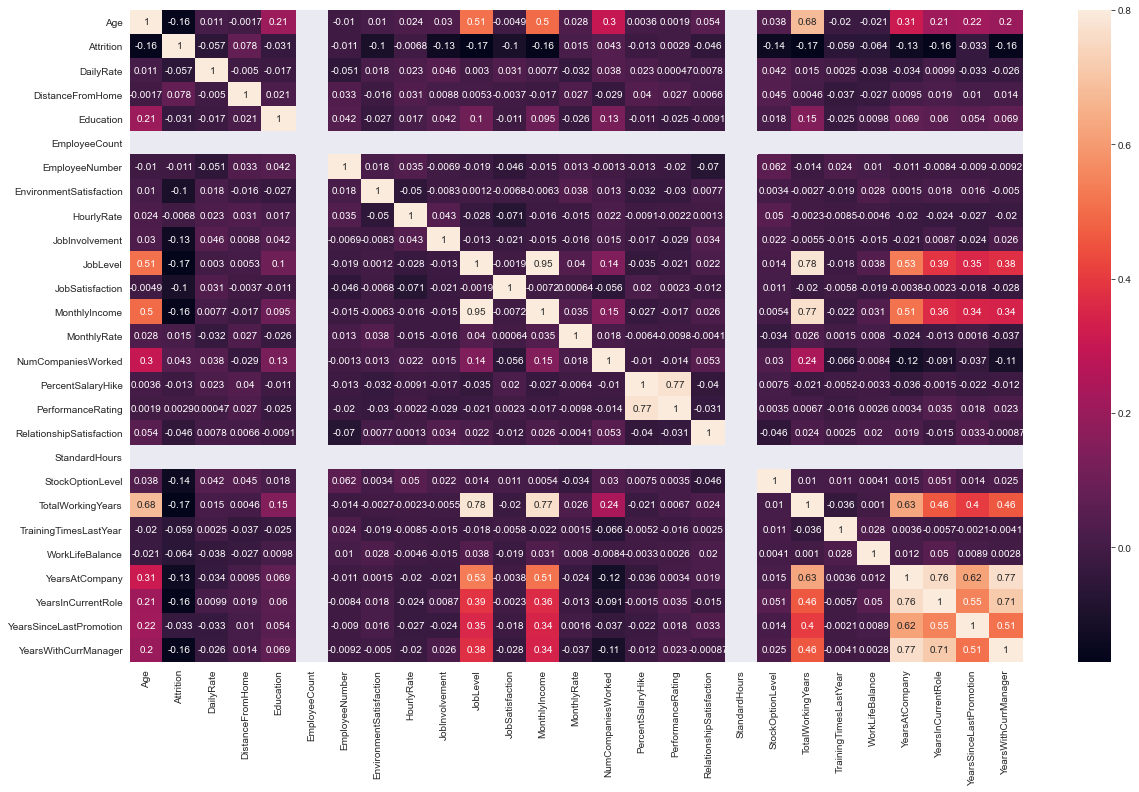

In [224]:
corr_matrix = df.corr()
f , ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix,vmax=0.8, annot=True)

The above graph shows the correlation between independent variables. We perform this to necessarily check for multi collinearity. A rule of thumb that is followed for multi collinearity is if correlation coefficient (r) is close to 0.80. Based on that we identify the following variables to have a high correlation:

Correlation between MonthlyIncome and JobLevel is 0.95. This is a very high correlation.

Correlation between TotalWorkingYears and JobLevel is 0.78 which is also very close to 0.80.

All other variables seem to have a correlation which is less than 0.80.

In [192]:
for n in categorical_cols:
    print(pd.crosstab(df['Attrition'],df[n],normalize='columns'))


BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Attrition                                                   
0                     0.92           0.750903       0.850431
1                     0.08           0.249097       0.149569
Department  Human Resources  Research & Development     Sales
Attrition                                                    
0                  0.809524                0.861602  0.793722
1                  0.190476                0.138398  0.206278
EducationField  Human Resources  Life Sciences  Marketing   Medical     Other  \
Attrition                                                                       
0                      0.740741       0.853135   0.779874  0.864224  0.865854   
1                      0.259259       0.146865   0.220126  0.135776  0.134146   

EducationField  Technical Degree  
Attrition                         
0                       0.757576  
1                       0.242424  
Gender       Female      Male
Attrition    

In [193]:
categorical_df_dummies=pd.get_dummies(df[categorical_cols],drop_first=True)
final_df=pd.concat([categorical_df_dummies,numerical_df],axis=1)

In [194]:
final_df.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,...,1,80,0,8,0,1,6,4,0,5
1,1,0,1,0,1,0,0,0,0,1,...,4,80,1,10,3,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,1,...,2,80,0,7,3,3,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,...,3,80,0,8,3,3,8,7,3,0
4,0,1,1,0,0,0,1,0,0,1,...,4,80,1,6,3,3,2,2,2,2


In [195]:
y=final_df.Attrition
X=final_df.drop(['Attrition'], axis=1)

<b>Splitting Data in Train and Test Set</b>

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,precision_recall_curve,confusion_matrix,precision_score,confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

<b>Building base model(Predicting that no employee leaves the company)</b>

In [197]:
base=np.zeros(1470)
print(accuracy_score(base,df.Attrition))

0.8387755102040816


Base model has 83.8% accuracy. Thus accuracy is not best criteria to check the performance of the model

<b>Method that applies model on the data and Predict the attrition</b>

In [198]:
def model(mod,model_name,x_tr,y_tr,x_tes,y_te):
    mod.fit(x_tr,y_tr)
    pred_dt=mod.predict(x_tes)
    print("     ",model_name,"      ")
    print("Accuracy ",accuracy_score(pred_dt,y_te))
    print("ROC_AUC  ",roc_auc_score(pred_dt,y_te))
    cm=confusion_matrix(pred_dt,y_te)
    print("Confusion Matrix  \n",cm)
    print("                    Classification Report \n",classification_report(pred_dt,y_te))

In [199]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model(lr,"Logistic Regression",X_train,y_train,X_test,y_test)

      Logistic Regression       
Accuracy  0.8435374149659864
ROC_AUC   0.9215017064846416
Confusion Matrix  
 [[247  46]
 [  0   1]]
                    Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.84      0.91       293
           1       0.02      1.00      0.04         1

    accuracy                           0.84       294
   macro avg       0.51      0.92      0.48       294
weighted avg       1.00      0.84      0.91       294



Accuracy is 84% but Precision and Recall for class 1 is low

In [200]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
model(dt,"Decision Tree",X_train,y_train,X_test,y_test)

      Decision Tree       
Accuracy  0.8503401360544217
ROC_AUC   0.7186617100371747
Confusion Matrix  
 [[236  33]
 [ 11  14]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.88      0.91       269
           1       0.30      0.56      0.39        25

    accuracy                           0.85       294
   macro avg       0.63      0.72      0.65       294
weighted avg       0.90      0.85      0.87       294



Accuracy is 85% but again Precision and Recall for class 1 is low

In [201]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,max_depth=4)
model(rf,"Random Forest",X_train,y_train,X_test,y_test)

      Random Forest       
Accuracy  0.8469387755102041
ROC_AUC   0.7390734265734266
Confusion Matrix  
 [[244  42]
 [  3   5]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.85      0.92       286
           1       0.11      0.62      0.18         8

    accuracy                           0.85       294
   macro avg       0.55      0.74      0.55       294
weighted avg       0.96      0.85      0.90       294



Accuracy is 84% but even though recall is better ,Precision is low for class 1

<b>Due to Class Imbalance problem model is not able to make predictions on class 1(Attrition Yes)</b>

Performing OverSample

In [213]:
!conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.



In [214]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [215]:
X_sm, y_sm=smote.fit_sample(X,y)

In [216]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm,y_sm,test_size=0.2,random_state=100)


In [217]:
lr_sm=LogisticRegression()
model(lr_sm,"Logistic Regression",X_train_sm,y_train_sm,X_test_sm,y_test_sm)

      Logistic Regression       
Accuracy  0.6882591093117408
ROC_AUC   0.6883084944173922
Confusion Matrix  
 [[172  79]
 [ 75 168]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.70      0.69      0.69       251
           1       0.68      0.69      0.69       243

    accuracy                           0.69       494
   macro avg       0.69      0.69      0.69       494
weighted avg       0.69      0.69      0.69       494



 Precision and Recall for class 1 is improved

In [218]:
dt_sm=DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
model(dt_sm,"Decision Tree",X_train_sm,y_train_sm,X_test_sm,y_test_sm)

      Decision Tree       
Accuracy  0.7874493927125507
ROC_AUC   0.7920496935784705
Confusion Matrix  
 [[210  68]
 [ 37 179]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       278
           1       0.72      0.83      0.77       216

    accuracy                           0.79       494
   macro avg       0.79      0.79      0.79       494
weighted avg       0.80      0.79      0.79       494



 Precision and Recall for class 1 is improved

In [219]:
rf_sm=RandomForestClassifier(n_estimators=10,max_depth=4)
model(rf_sm,"Random Forest",X_train_sm,y_train_sm,X_test_sm,y_test_sm)

      Random Forest       
Accuracy  0.8421052631578947
ROC_AUC   0.8432078667390196
Confusion Matrix  
 [[215  46]
 [ 32 201]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.82      0.85       261
           1       0.81      0.86      0.84       233

    accuracy                           0.84       494
   macro avg       0.84      0.84      0.84       494
weighted avg       0.84      0.84      0.84       494



Accuracy is high and Precision and Recall for class 1 is also High

Based on the above chart, we can conclude that StockOptionLevel plays a very important role in deciding the attrition of the employee. Apart from that, MonthlyIncome, JobSatisfaction, JobInvolvement also are among the top contributors. On the other hand, factors such as PerformanceRating, Gender, Department tend not to contribute as significantly

Based on the overall project, there are certain points that needs to be kept in order to get an optimum output from the model.

The HR Department can focus on the important variables that contribute significantly in determining if an employee is going to leave an organization. Such variables are:

* StockOptionLevel<br>
* MonthlyIncome<br>
* JobSatisfaction<br>
* JobInvolvement<br>
* WorkLifeBalance<br>
* EnvironmentSatisfaction

Based on the above variables, one can clearly notice a pattern. The employees are more concerned with the materialistic objects that they get directly in hand. Then comes the psychological variables that determines if an employee might leave the organization.

Hence, the HR can focus on such aspects and understand from the viewpoint of the employees. Once that is followed, the project that is called Attrition project can be used as a Retention project. This can immensely help the organization.

Secondly, the model needs to be tuned from time to time as and when new dataset is received. In case any new input variable is introduced, it is important that the information is retrieved for the employees who participated in the initial study.